## Estimate Weekly Sales for the Seattle Store

**Goal:** In this activity, you will use the weekly sales in the toys department to estimate the total weekly sales across the entire store. 

Start by importing the libraries and individual functions you will need for this activity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sns.set()

## 1. Import the Data

The Toys data has already been filtered and joined to the full-store data. Import the dataset from the `toys_join_all.csv` file. 

In [2]:
toys_join_all = pd.read_csv('toys_join_all.csv')

## 2. Visualize the Relationship

Produce a scatterplot to show the relationship between toys sales and full-store sales. 

Text(0.5, 1.0, 'Weekly Seattle Store Sales')

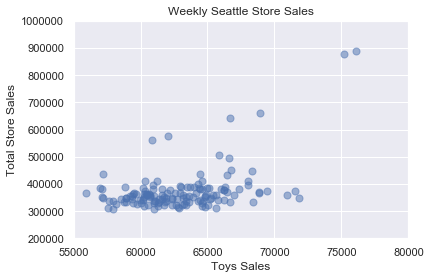

In [7]:
fig, ax = plt.subplots()
ax.scatter(toys_join_all["Weekly_Sales_toys"], 
           toys_join_all["Weekly_Sales_all"], 
           s=50, 
           alpha=0.5)
ax.set_xlim(55000, 80000)
ax.set_ylim(200000, 1000000)
ax.set_xlabel("Toys Sales")
ax.set_ylabel("Total Store Sales")
ax.set_title("Weekly Seattle Store Sales")

## 3. Compute the Linear Estimate

Create a linear regression object and use it to fit the toys data. Use the estimate to compute two points on the line and reproduce your scatterplot with the linear estimate overlaid. 


In [8]:
lr_toys = LinearRegression()
lr_toys.fit(toys_join_all[["Weekly_Sales_toys"]], toys_join_all["Weekly_Sales_all"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
a, b = lr_toys.intercept_, lr_toys.coef_
a, b

(-308339.3179201591, array([10.83662459]))

In [10]:
x1 = 5500
y1 = a + b*x1
x2 = 80000
y2 = a + b*x2


Text(0.5, 1.0, 'Weekly Seattle Store Sales')

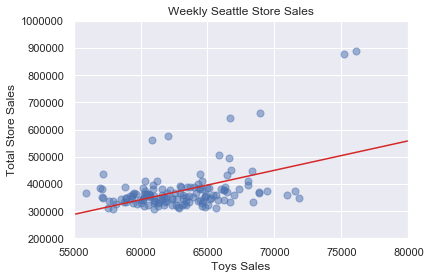

In [12]:
fig, ax = plt.subplots()
ax.scatter(toys_join_all["Weekly_Sales_toys"], 
           toys_join_all["Weekly_Sales_all"],
              s=50,
              alpha=0.5)
ax.plot([x1, x2], [y1, y2], c='tab:red')
ax.set_xlim(55000, 80000)
ax.set_ylim(200000, 1000000)
ax.set_xlabel("Toys Sales")
ax.set_ylabel("Total Store Sales")
ax.set_title("Weekly Seattle Store Sales")

## 4. Compute RMSE 

Use the linear model you just computed to find the RMSE for this data. 

In [14]:
sales_true = toys_join_all["Weekly_Sales_all"]
sales_pred_toys = lr_toys.predict(toys_join_all[["Weekly_Sales_toys"]])
mse_toys = mean_squared_error(sales_true, sales_pred_toys)
print("The RMSE for the toys model is: ", np.sqrt(mse_toys))

The RMSE for the toys model is:  71121.15022419463
